In [4]:
from pyspark.sql import SparkSession


In [5]:
spark = SparkSession.builder \
    .appName("Prediction") \
    .getOrCreate()
spark


In [ ]:
paths=r"C:\Users\aamir\Desktop\YC\P\SmartLogisticsAI\app\data\DataCoSupplyChainDataset.csv"

df = spark.read.csv(
    path=paths,
    header=True,            
    inferSchema=True
)

In [7]:
df.printSchema()

root
 |-- Type: string (nullable = true)
 |-- Days for shipping (real): integer (nullable = true)
 |-- Days for shipment (scheduled): integer (nullable = true)
 |-- Benefit per order: double (nullable = true)
 |-- Sales per customer: double (nullable = true)
 |-- Delivery Status: string (nullable = true)
 |-- Late_delivery_risk: integer (nullable = true)
 |-- Category Id: integer (nullable = true)
 |-- Category Name: string (nullable = true)
 |-- Customer City: string (nullable = true)
 |-- Customer Country: string (nullable = true)
 |-- Customer Email: string (nullable = true)
 |-- Customer Fname: string (nullable = true)
 |-- Customer Id: integer (nullable = true)
 |-- Customer Lname: string (nullable = true)
 |-- Customer Password: string (nullable = true)
 |-- Customer Segment: string (nullable = true)
 |-- Customer State: string (nullable = true)
 |-- Customer Street: string (nullable = true)
 |-- Customer Zipcode: integer (nullable = true)
 |-- Department Id: integer (nullable = 

In [8]:
df.show()

+--------+------------------------+-----------------------------+-----------------+------------------+-----------------+------------------+-----------+--------------+--------------+----------------+--------------+--------------+-----------+--------------+-----------------+----------------+--------------+--------------------+----------------+-------------+---------------+-----------+------------+------------+----------+-------------+-----------------+-----------------------+--------+----------------------+-------------------+------------------------+-------------+------------------------+-----------------------+-------------------+------+----------------+----------------------+--------------+--------------------+---------------+-------------+---------------+-------------------+-------------------+--------------------+------------+-------------+--------------+--------------------------+--------------+
|    Type|Days for shipping (real)|Days for shipment (scheduled)|Benefit per order|Sale

In [9]:
df.describe().show()


+-------+--------+------------------------+-----------------------------+------------------+------------------+----------------+-------------------+------------------+------------------+-------------+----------------+--------------+--------------+-----------------+--------------+-----------------+----------------+------------------+---------------+-----------------+------------------+---------------+-----------------+------------------+------+--------------+-------------+-----------------+-----------------------+------------------+----------------------+-------------------+------------------------+-----------------+------------------------+-----------------------+-------------------+------------------+------------------+----------------------+--------------+--------------+---------------+------------------+------------------+-------------------+-------------------+--------------------+--------------------+-----------------+--------------+--------------------------+--------------+
|summ

In [10]:
df.printSchema()

root
 |-- Type: string (nullable = true)
 |-- Days for shipping (real): integer (nullable = true)
 |-- Days for shipment (scheduled): integer (nullable = true)
 |-- Benefit per order: double (nullable = true)
 |-- Sales per customer: double (nullable = true)
 |-- Delivery Status: string (nullable = true)
 |-- Late_delivery_risk: integer (nullable = true)
 |-- Category Id: integer (nullable = true)
 |-- Category Name: string (nullable = true)
 |-- Customer City: string (nullable = true)
 |-- Customer Country: string (nullable = true)
 |-- Customer Email: string (nullable = true)
 |-- Customer Fname: string (nullable = true)
 |-- Customer Id: integer (nullable = true)
 |-- Customer Lname: string (nullable = true)
 |-- Customer Password: string (nullable = true)
 |-- Customer Segment: string (nullable = true)
 |-- Customer State: string (nullable = true)
 |-- Customer Street: string (nullable = true)
 |-- Customer Zipcode: integer (nullable = true)
 |-- Department Id: integer (nullable = 

In [11]:
cat_cols = [
    "Type",
    "Delivery Status",
    "Category Name",
    "Customer City",
    "Customer Country",
    "Customer Email",
    "Customer Fname",
    "Customer Lname",
    "Customer Password",
    "Customer Segment",
    "Customer State",
    "Customer Street",
    "Department Name",
    "Market",
    "Order City",
    "Order Country",
    "order date (DateOrders)",
    "Order Region",
    "Order State",
    "Order Status",
    "Product Description",
    "Product Image",
    "Product Name",
    "shipping date (DateOrders)",
    "Shipping Mode"
]
num_cols = [
    "Days for shipping (real)",
    "Days for shipment (scheduled)",
    "Benefit per order",
    "Sales per customer",
    "Late_delivery_risk",
    "Category Id",
    "Customer Id",
    "Customer Zipcode",
    "Department Id",
    "Latitude",
    "Longitude",
    "Order Customer Id",
    "Order Id",
    "Order Item Cardprod Id",
    "Order Item Discount",
    "Order Item Discount Rate",
    "Order Item Id",
    "Order Item Product Price",
    "Order Item Profit Ratio",
    "Order Item Quantity",
    "Sales",
    "Order Item Total",
    "Order Profit Per Order",
    "Order Zipcode",
    "Product Card Id",
    "Product Category Id",
    "Product Price",
    "Product Status"
]


In [12]:
df.select(num_cols).describe().show()

+-------+------------------------+-----------------------------+------------------+------------------+-------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+----------------------+-------------------+------------------------+-----------------+------------------------+-----------------------+-------------------+------------------+------------------+----------------------+------------------+------------------+-------------------+-----------------+--------------+
|summary|Days for shipping (real)|Days for shipment (scheduled)| Benefit per order|Sales per customer| Late_delivery_risk|       Category Id|      Customer Id| Customer Zipcode|     Department Id|         Latitude|         Longitude|Order Customer Id|          Order Id|Order Item Cardprod Id|Order Item Discount|Order Item Discount Rate|    Order Item Id|Order Item Product Price|Order Item Profit Ratio|Order Item Quanti

In [13]:
df.select(cat_cols).describe().show()

+-------+--------+----------------+------------------+-------------+----------------+--------------+--------------+--------------+-----------------+----------------+------------------+---------------+---------------+------+--------------+-------------+-----------------------+--------------+--------------+---------------+-------------------+--------------------+--------------------+--------------------------+--------------+
|summary|    Type| Delivery Status|     Category Name|Customer City|Customer Country|Customer Email|Customer Fname|Customer Lname|Customer Password|Customer Segment|    Customer State|Customer Street|Department Name|Market|    Order City|Order Country|order date (DateOrders)|  Order Region|   Order State|   Order Status|Product Description|       Product Image|        Product Name|shipping date (DateOrders)| Shipping Mode|
+-------+--------+----------------+------------------+-------------+----------------+--------------+--------------+--------------+----------------

In [14]:
columns_to_drop = [
    "Order Id", "Order Item Id", "Order Customer Id", "Customer Id",
    "Order Item Cardprod Id", "Product Card Id",
    
    "Product Category Id", "Department Id", "Category Id",
    
    "Customer Email", "Customer Fname", "Customer Lname", 
    "Customer Password", "Customer Street", "Customer Zipcode",
    
    "Order Zipcode",
    
    "Product Description", "Product Image", "Product Name",
    
 
    "Type",
    "Product Status",
    "Order Status"
]

df = df.drop(*columns_to_drop)
print(f" Supprimé {len(columns_to_drop)} colonnes non utiles.")

print("Colonnes restantes :", df.columns)


 Supprimé 22 colonnes non utiles.
Colonnes restantes : ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Product Price', 'shipping date (DateOrders)', 'Shipping Mode']


In [15]:
df.columns

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'order date (DateOrders)',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Product Price',
 'shipping date (DateOrders)',
 'Shipping Mode']

In [16]:
from pyspark.sql.functions import to_timestamp, month, year, count

df = df.withColumn(
    "order_date",
    to_timestamp("order date (DateOrders)", "M/d/yyyy H:mm")
)

df = df.withColumn("order_year", year("order_date")) \
       .withColumn("order_month", month("order_date"))

orders_per_month = df.groupBy("order_year", "order_month") \
                     .agg(count("*").alias("total_orders")) \
                     .orderBy("order_year", "order_month")

orders_per_month.show()


+----------+-----------+------------+
|order_year|order_month|total_orders|
+----------+-----------+------------+
|      2015|          1|        5322|
|      2015|          2|        4729|
|      2015|          3|        5362|
|      2015|          4|        5126|
|      2015|          5|        5357|
|      2015|          6|        5134|
|      2015|          7|        5299|
|      2015|          8|        5273|
|      2015|          9|        5140|
|      2015|         10|        5302|
|      2015|         11|        5235|
|      2015|         12|        5371|
|      2016|          1|        5317|
|      2016|          2|        4894|
|      2016|          3|        5210|
|      2016|          4|        5097|
|      2016|          5|        5302|
|      2016|          6|        5054|
|      2016|          7|        5305|
|      2016|          8|        5334|
+----------+-----------+------------+
only showing top 20 rows


In [17]:
data = df.dropDuplicates().show()

+------------------------+-----------------------------+-----------------+------------------+-----------------+------------------+--------------------+--------------+----------------+----------------+--------------+---------------+-----------+------------+------------+-----------------+-------------+-----------------------+-------------------+------------------------+------------------------+-----------------------+-------------------+-----------+----------------+----------------------+---------------+--------------------+-------------+--------------------------+--------------+-------------------+----------+-----------+
|Days for shipping (real)|Days for shipment (scheduled)|Benefit per order|Sales per customer|  Delivery Status|Late_delivery_risk|       Category Name| Customer City|Customer Country|Customer Segment|Customer State|Department Name|   Latitude|   Longitude|      Market|       Order City|Order Country|order date (DateOrders)|Order Item Discount|Order Item Discount Rate|Or

In [18]:
from pyspark.sql.functions import col, count, when, trim, isnan
from pyspark.sql.types import FloatType, DoubleType, DecimalType

null_counts = []
for c in df.columns:
    dtype = next(f.dataType for f in df.schema.fields if f.name == c)

    if isinstance(dtype, (FloatType, DoubleType, DecimalType)):
        cond = col(c).isNull() | isnan(col(c))
    else:
        cond = col(c).isNull() | (trim(col(c)) == "")
            
    null_counts.append(count(when(cond, c)).alias(c))

nulldata = df.select(null_counts)
nulldata.show()

+------------------------+-----------------------------+-----------------+------------------+---------------+------------------+-------------+-------------+----------------+----------------+--------------+---------------+--------+---------+------+----------+-------------+-----------------------+-------------------+------------------------+------------------------+-----------------------+-------------------+-----+----------------+----------------------+------------+-----------+-------------+--------------------------+-------------+----------+----------+-----------+
|Days for shipping (real)|Days for shipment (scheduled)|Benefit per order|Sales per customer|Delivery Status|Late_delivery_risk|Category Name|Customer City|Customer Country|Customer Segment|Customer State|Department Name|Latitude|Longitude|Market|Order City|Order Country|order date (DateOrders)|Order Item Discount|Order Item Discount Rate|Order Item Product Price|Order Item Profit Ratio|Order Item Quantity|Sales|Order Item To

In [19]:
from pyspark.sql.types import NumericType
from pyspark.sql.functions import col, expr

numeric_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, NumericType)]
print("Colonnes numeriques :", numeric_cols)

for c in numeric_cols:
    median = df.approxQuantile(c, [0.5], 0.01)[0]  
    if median is not None:
        df = df.fillna({c: median})

print(" done ")


Colonnes numeriques : ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'Latitude', 'Longitude', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Price', 'order_year', 'order_month']
 done 


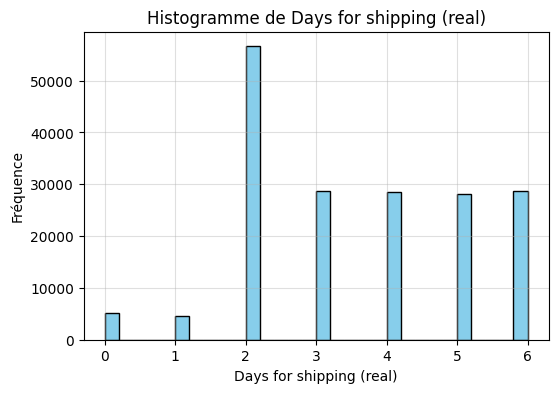

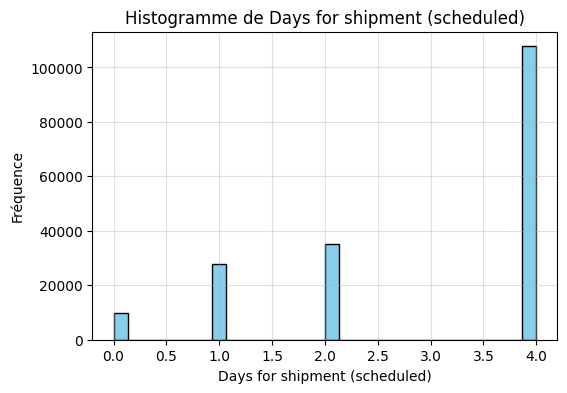

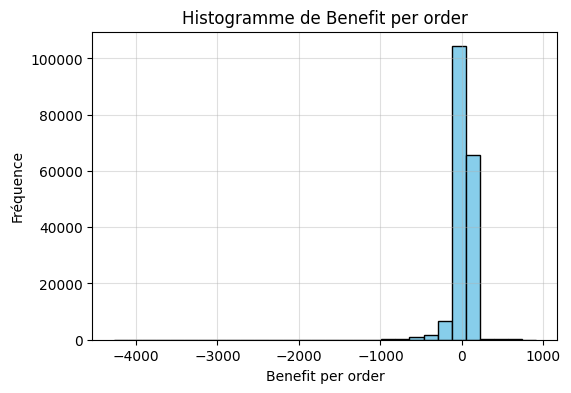

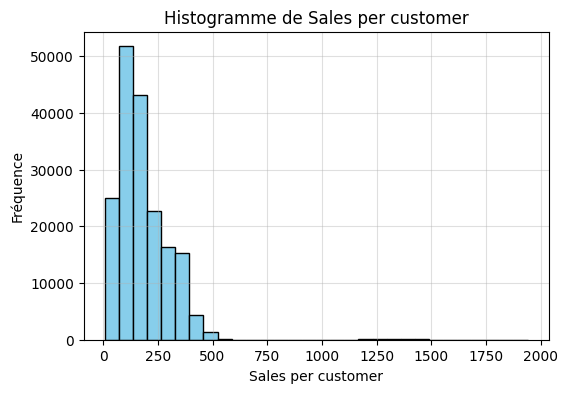

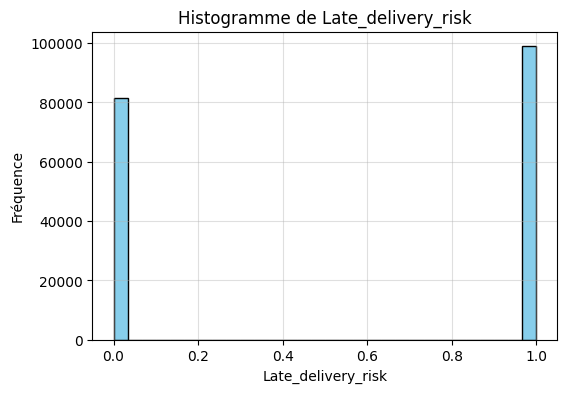

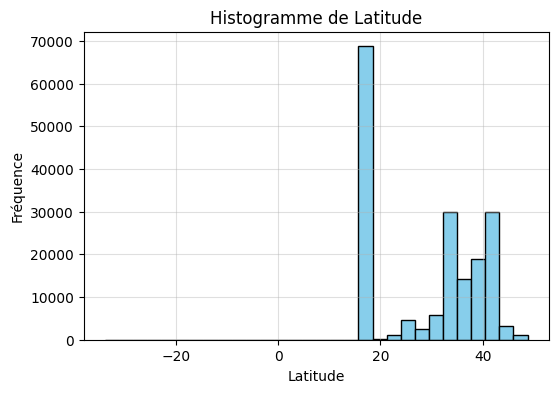

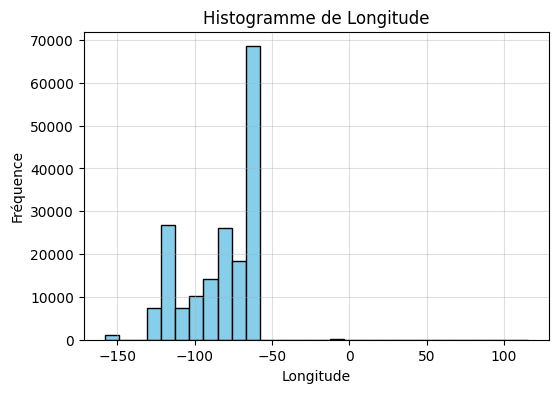

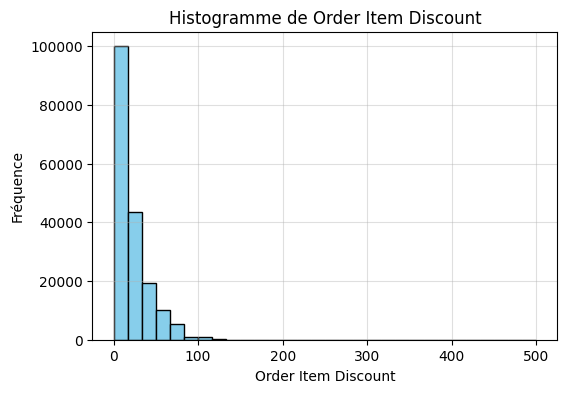

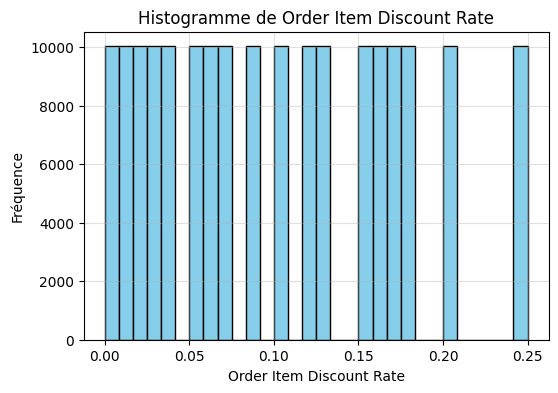

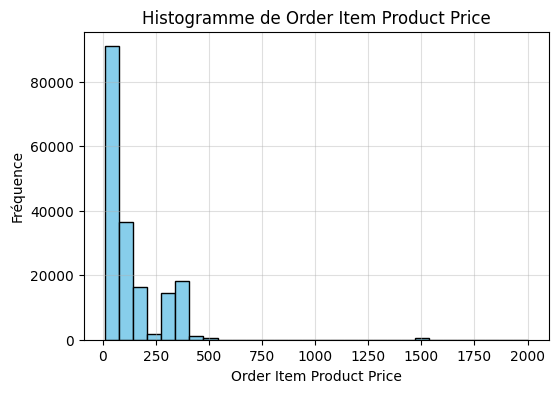

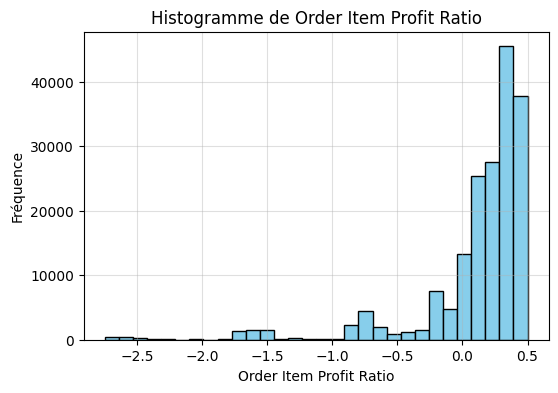

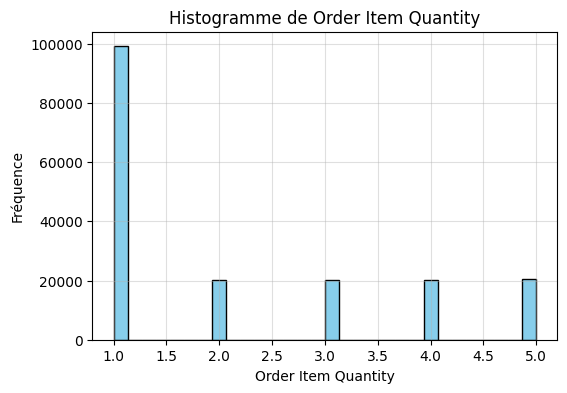

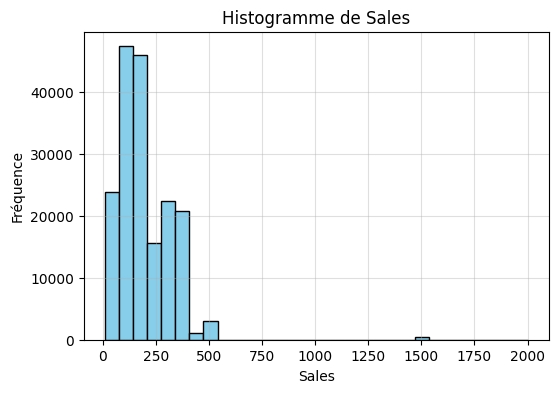

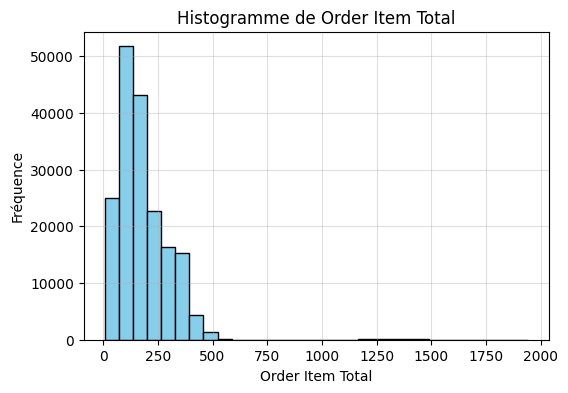

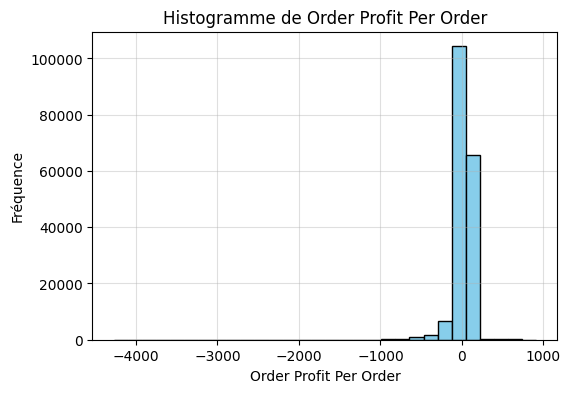

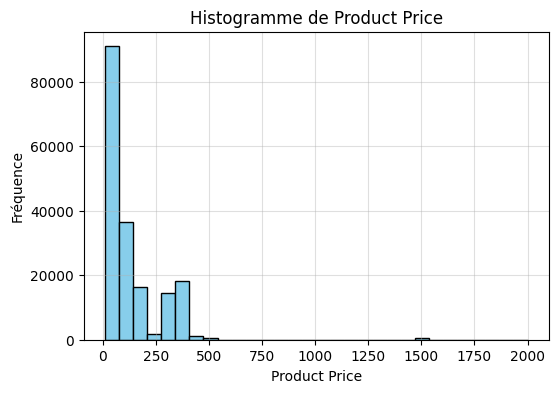

In [20]:

existing_cols = [col for col in num_cols if col in df.columns]

if not existing_cols:
    raise ValueError("Aucune des colonnes spécifiées n'existe dans le DataFrame.")

numeric_df = df.select(existing_cols)

numeric_pd = numeric_df.toPandas()

import matplotlib.pyplot as plt

for col in existing_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(numeric_pd[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.title(f"Histogramme de {col}")
    plt.ylabel("Fréquence")
    plt.grid(alpha=0.4)
    plt.show()


In [21]:
from pyspark.sql.functions import col

df = df.withColumn("Delivery_Delay", col("Days for shipping (real)") - col("Days for shipment (scheduled)"))


In [22]:
from pyspark.sql.functions import datediff

df = df.withColumn("Order_to_Shipping_Days", datediff(col("shipping date (DateOrders)"), col("order date (DateOrders)")))


In [23]:
df = df.withColumn("Profit_Rate", col("Benefit per order") / col("Sales per customer"))


In [24]:
df = df.withColumn("Discount_Effect", col("Order Item Discount") / col("Order Item Product Price"))

In [25]:
	
all_locations = df.select("Order City","Order Country").distinct().collect()
for j,i in enumerate(all_locations):
    print(j,i)

0 Row(Order City='Tepic', Order Country='M�xico')
1 Row(Order City='Kalemie', Order Country='Rep�blica Democr�tica del Congo')
2 Row(Order City='Stuttgart', Order Country='Alemania')
3 Row(Order City='Gdansk', Order Country='Polonia')
4 Row(Order City='Zurich', Order Country='Suiza')
5 Row(Order City='Mbandaka', Order Country='Rep�blica Democr�tica del Congo')
6 Row(Order City='Sukabumi', Order Country='Indonesia')
7 Row(Order City='Jamund�', Order Country='Colombia')
8 Row(Order City='Esbjerg', Order Country='Dinamarca')
9 Row(Order City='Maxixe', Order Country='Mozambique')
10 Row(Order City='Chihuahua', Order Country='M�xico')
11 Row(Order City='Tongchuan', Order Country='China')
12 Row(Order City='Port Harcourt', Order Country='Nigeria')
13 Row(Order City='Ankara', Order Country='Turqu�a')
14 Row(Order City='Konya', Order Country='Turqu�a')
15 Row(Order City='Levallois-Perret', Order Country='Francia')
16 Row(Order City='Mesquite', Order Country='Estados Unidos')
17 Row(Order City=

In [26]:
df.columns

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'order date (DateOrders)',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Product Price',
 'shipping date (DateOrders)',
 'Shipping Mode',
 'order_date',
 'order_year',
 'order_month',
 'Delivery_Delay',
 'Order_to_Shipping_Days',
 'Profit_Rate',
 'Discount_Effect']

In [27]:
df.printSchema()

root
 |-- Days for shipping (real): integer (nullable = true)
 |-- Days for shipment (scheduled): integer (nullable = true)
 |-- Benefit per order: double (nullable = false)
 |-- Sales per customer: double (nullable = false)
 |-- Delivery Status: string (nullable = true)
 |-- Late_delivery_risk: integer (nullable = true)
 |-- Category Name: string (nullable = true)
 |-- Customer City: string (nullable = true)
 |-- Customer Country: string (nullable = true)
 |-- Customer Segment: string (nullable = true)
 |-- Customer State: string (nullable = true)
 |-- Department Name: string (nullable = true)
 |-- Latitude: double (nullable = false)
 |-- Longitude: double (nullable = false)
 |-- Market: string (nullable = true)
 |-- Order City: string (nullable = true)
 |-- Order Country: string (nullable = true)
 |-- order date (DateOrders): string (nullable = true)
 |-- Order Item Discount: double (nullable = false)
 |-- Order Item Discount Rate: double (nullable = false)
 |-- Order Item Product Pr

In [28]:
# import requests
# from concurrent.futures import ThreadPoolExecutor, as_completed
# from tqdm import tqdm
# import pandas as pd

# API_KEY = "b9bab4e7da7042bcb34688983dfdaed3"

# # Read Spark DF → Pandas
# delivery_location_columns = df.select(
#     "Order City", "Order State", "Order Country"
# ).distinct().toPandas()

# # Build a single location string
# delivery_location_columns['location_str'] = (
#     delivery_location_columns['Order City'].fillna('') + ', ' +
#     delivery_location_columns['Order State'].fillna('') + ', ' +
#     delivery_location_columns['Order Country'].fillna('')
# )

# unique_strs = delivery_location_columns['location_str'].unique()

# # Geoapify geocoding function
# def geocode_geoapify(loc_str):
#     try:
#         url = (
#             "https://api.geoapify.com/v1/geocode/search"
#             f"?text={loc_str}&apiKey={API_KEY}"
#         )

#         response = requests.get(url, timeout=10)
#         data = response.json()

#         features = data.get("features", [])
#         if features:
#             props = features[0]["properties"]
#             lat = props.get("lat")
#             lon = props.get("lon")
#             return loc_str, (lat, lon)

#         return loc_str, (None, None)

#     except Exception:
#         return loc_str, (None, None)

# coords_dict = {}

# # Parallel requests (Geoapify allows concurrency)
# with ThreadPoolExecutor(max_workers=20) as executor:
#     futures = {executor.submit(geocode_geoapify, loc): loc for loc in unique_strs}

#     for future in tqdm(as_completed(futures), total=len(unique_strs)):
#         loc_str, coords = future.result()
#         coords_dict[loc_str] = coords

# # Map coordinates back
# delivery_location_columns[['dest_lat', 'dest_lon']] = pd.DataFrame(
#     delivery_location_columns['location_str'].map(coords_dict).tolist(),
#     index=delivery_location_columns.index
# )

# # Save as CSV
# delivery_location_columns.to_csv("geocoded_locations.csv", index=False)

# print("Geoapify Geocoding complete.")


In [29]:
# import pandas as pd
# import unicodedata

# # Read
# df = pd.read_csv("geocoded_locations.csv", encoding="utf-8", encoding_errors="ignore",encoding="ISO-8859-1")

# # Clean Unicode
# def fix_unicode(x):
#     if isinstance(x, str):
#         return unicodedata.normalize("NFKC", x)
#     return x

# df = df.applymap(fix_unicode)

# # Save clean version
# df.to_csv("geocoded_fixed.csv", encoding="utf-8-sig", index=False)


In [30]:
df.columns

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Segment',
 'Customer State',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'order date (DateOrders)',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Product Price',
 'shipping date (DateOrders)',
 'Shipping Mode',
 'order_date',
 'order_year',
 'order_month',
 'Delivery_Delay',
 'Order_to_Shipping_Days',
 'Profit_Rate',
 'Discount_Effect']

In [31]:
# import math

# def haversine_distance(lat1, lon1, lat2, lon2):
#     if None in (lat1, lon1, lat2, lon2):
#         return None

#     R = 6371.0  

#     lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

#     dlat = lat2 - lat1
#     dlon = lon2 - lon1

#     a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
#     c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

#     return R * c


In [32]:
# Categorical columns
colonne_categ = [c for c in ["Customer Country","Customer State","Customer City","Customer Segment",
                             "Department Name","Category Name","Market","Order City","Order Country",
                             "Shipping Mode","Delivery Status"] if c in df.columns]

# Numeric columns
colonne_num = [c for c in ["Days for shipment (scheduled)","Benefit per order",
                            "Sales per customer","Order Item Discount","Order Item Product Price",
                            "Order Item Quantity","Sales","Order Item Profit Ratio","Order_to_Shipping_Days",
                            "Profit_Rate","Discount_Effect","Total_Order_Value",
                            "order_month","order_day","order_dayofweek","order_quarter"] if c in df.columns]


In [33]:
from pyspark.sql.functions import to_timestamp, col

# Conversion sécurisée des dates
df = df.withColumn(
    "order_date",
    to_timestamp("order date (DateOrders)", "M/d/yyyy H:mm")
)

df = df.withColumn(
    "shipping_date",
    to_timestamp("shipping date (DateOrders)", "M/d/yyyy H:mm")
)

# Supprimer les lignes où les dates n'ont pas pu être converties
df = df.filter(col("order_date").isNotNull() & col("shipping_date").isNotNull())

# Recalcul des features temporelles
from pyspark.sql.functions import year, month, dayofmonth, dayofweek, quarter, datediff

df = df.withColumn("order_year", year("order_date")) \
       .withColumn("order_month", month("order_date")) \
       .withColumn("order_day", dayofmonth("order_date")) \
       .withColumn("order_dayofweek", dayofweek("order_date")) \
       .withColumn("order_quarter", quarter("order_date"))

# Délais
df = df.withColumn("Order_to_Shipping_Days", datediff(col("shipping_date"), col("order_date")))
df = df.withColumn("Delivery_Delay", col("Days for shipping (real)") - col("Days for shipment (scheduled)"))


In [34]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder, StandardScaler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
import pandas as pd

In [35]:
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)
print(f"Train={train_df.count()}, Test={test_df.count()}")


Train=144625, Test=35894


In [36]:
# StringIndexer for categorical columns
indexers = [
    StringIndexer(inputCol=col, outputCol=f"{col}_indexed", handleInvalid="keep")
    for col in colonne_categ
]

# OneHotEncoder
encoder = OneHotEncoder(
    inputCols=[f"{col}_indexed" for col in colonne_categ],
    outputCols=[f"{col}_ohe" for col in colonne_categ]
)

# VectorAssembler
assembler = VectorAssembler(
    inputCols=colonne_num + [f"{col}_ohe" for col in colonne_categ],
    outputCol="features"
)

# StandardScaler
scaler = StandardScaler(
    inputCol="features",
    outputCol="scaledFeatures",
    withMean=True,
    withStd=True
)

In [37]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator


In [38]:
# ------------------- Random Forest -------------------
rf = RandomForestClassifier(
    featuresCol="scaledFeatures",
    labelCol="Late_delivery_risk",
    numTrees=100
)
training_pipeline = Pipeline(stages=indexers + [encoder, assembler, scaler, rf])
# ------------------- Hyperparameter tuning -------------------
evaluator = BinaryClassificationEvaluator(labelCol="Late_delivery_risk", metricName="areaUnderROC")
rf_paramGrid = (ParamGridBuilder()
                .addGrid(rf.maxDepth, [5, 10, 15])
                .addGrid(rf.numTrees, [50, 100])
                .build())

rf_cv = CrossValidator(
    estimator=training_pipeline,
    estimatorParamMaps=rf_paramGrid,
    evaluator=evaluator,
    numFolds=5,
    parallelism=4
)

In [38]:

rf_cvModel = rf_cv.fit(train_df)
print("✓ Modèle RandomForest entraîné")





ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "C:\Users\aamir\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py", line 3699, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
    ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aamir\AppData\Local\Temp\ipykernel_37252\4249345729.py", line 1, in <module>
    rf_cvModel = rf_cv.fit(train_df)
  File "c:\Users\aamir\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyspark\ml\base.py", line 203, in fit
    return self._fit(dataset)
           ~~~~~~~~~^^^^^^^^^
  File "c:\Users\aamir\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyspark\ml\tuning.py", line 858, in _fit
    for j, metric, subModel in pool.imap_unordered(lambda f: f(), tasks):
                               ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aamir\AppData\Local\Programs\Python\Python313\Lib\multiprocessing\pool.py", line 873, in 

ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cible l’a expressément refusée

ConnectionRefusedError: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cible l’a expressément refusée

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Predictions
rf_preds = rf_cvModel.transform(test_df)

# Binary metrics
binary_eval = BinaryClassificationEvaluator(
    labelCol="Late_delivery_risk",
    rawPredictionCol="rawPrediction"
)

auc_rf = binary_eval.evaluate(rf_preds, {binary_eval.metricName: "areaUnderROC"})
print("ROC-AUC :", auc_rf)

# Multiclass metrics (works for binary too)
accuracy_eval = MulticlassClassificationEvaluator(
    labelCol="Late_delivery_risk",
    predictionCol="prediction",
    metricName="accuracy"
)
precision_eval = MulticlassClassificationEvaluator(
    labelCol="Late_delivery_risk",
    predictionCol="prediction",
    metricName="weightedPrecision"
)
recall_eval = MulticlassClassificationEvaluator(
    labelCol="Late_delivery_risk",
    predictionCol="prediction",
    metricName="weightedRecall"
)
f1_eval = MulticlassClassificationEvaluator(
    labelCol="Late_delivery_risk",
    predictionCol="prediction",
    metricName="f1"
)

accuracy = accuracy_eval.evaluate(rf_preds)
precision = precision_eval.evaluate(rf_preds)
recall = recall_eval.evaluate(rf_preds)
f1 = f1_eval.evaluate(rf_preds)

print("Accuracy        :", accuracy)
print("Precision       :", precision)
print("Recall          :", recall)
print("F1 Score        :", f1)


25/11/21 09:56:31 WARN DAGScheduler: Broadcasting large task binary with size 1600.2 KiB
                                                                                

AUC-ROC: 0.9999999812150839


25/11/21 09:56:33 WARN DAGScheduler: Broadcasting large task binary with size 1612.2 KiB
                                                                                

Accuracy: 1.0


25/11/21 09:56:34 WARN DAGScheduler: Broadcasting large task binary with size 1612.2 KiB
                                                                                

Precision: 1.0


25/11/21 09:56:36 WARN DAGScheduler: Broadcasting large task binary with size 1612.2 KiB
                                                                                

Recall: 1.0


25/11/21 09:56:37 WARN DAGScheduler: Broadcasting large task binary with size 1612.2 KiB
[Stage 180:===============================================>       (19 + 3) / 22]

F1-score: 1.0


In [ ]:
rf_cvModel.write().overwrite().save("SmartLogisticsAI_models/rf_model")

✓ Modèle sauvegardé
